In [4]:
# import packages

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 
sns.set()

In [7]:
train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")

##### here is a sumary of missing data:
- missing data on 
    - Age 
    - Cabin
    - Embarked


In [22]:
def count_null():
    
    null_count = train.isna().sum()
    null_percentage = train.isna().sum() / train.shape[0]
    summary = pd.concat([null_count, null_percentage], axis = 1, keys = ['count', '%'])
    
    return summary

count_null()
    

,count,%
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,177,0.198653
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000


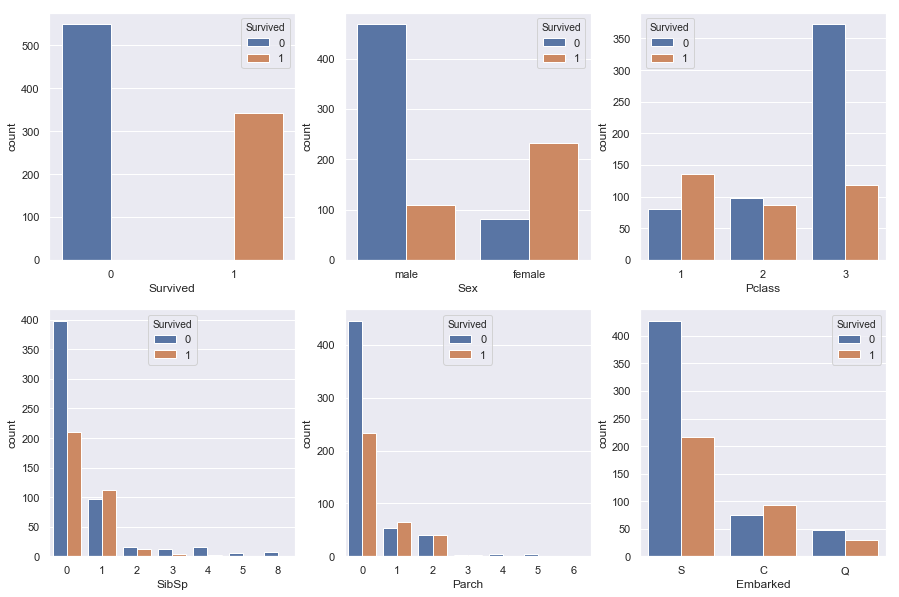

In [52]:
fig, axs = plt.subplots(nr_rows, nr_cols, figsize = (15, 10))

cols = ['Survived', 'Sex', 'Pclass', 'SibSp', 'Parch', 'Embarked']
nr_rows = 2
nr_cols = 3
n = 0

for i in range(0, nr_rows):
    for j in range(0, nr_cols):
        feature = cols[n]
        ax = axs[i][j]
        sns.countplot(train[cols[n]], hue=train["Survived"], ax=ax)
        n += 1


## females survive more than males
- maybe because they evacuate faster than males 

## pclass 1 survive more than pclass 3 
- they are rich 

## people without family (regarding SibSp and Parch) survive less
- significant number in SibSp == 0 or Parch == 0

## people who embarked from S and Q have higher possibilities of survival 

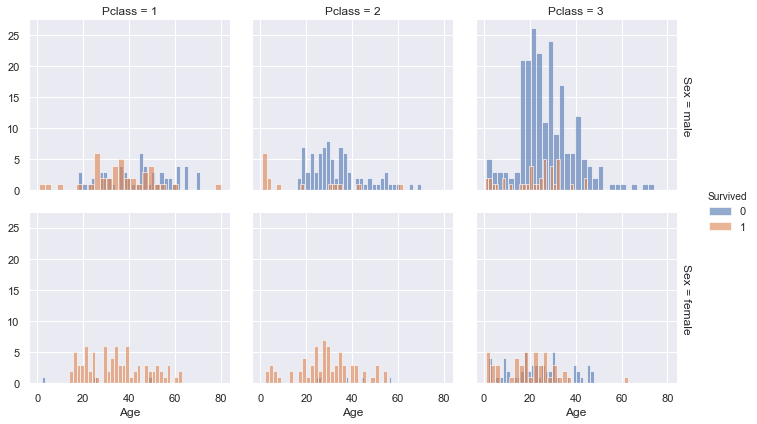

In [71]:
# dist plot 


g = sns.FacetGrid(train, row='Sex', col='Pclass', hue='Survived', margin_titles=True, size=3, aspect=1.1)
g.map(sns.distplot, 'Age', kde=False, bins=30, hist_kws=dict(alpha=0.6))
g.add_legend()  
plt.show()

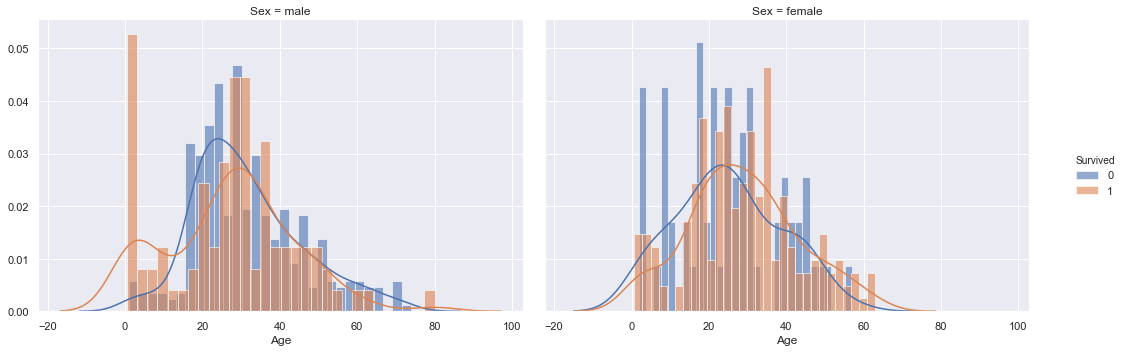

In [70]:
h= sns.FacetGrid(train, col = 'Sex', hue = 'Survived',margin_titles=True, size=5, aspect=1.5)
h.map(sns.distplot, 'Age', kde=True, bins=30, hist_kws=dict(alpha=0.6))
h.add_legend()  
plt.show()

1)  males tend to survive more when their pclass is 1, and when they are less than 5 years old 

2) females have least survival possibility when their pclass is 3 and age > 40

3) males in pclass 3, most of them are males and at the age of 15 - 30, they have least posibilitiy of survival 

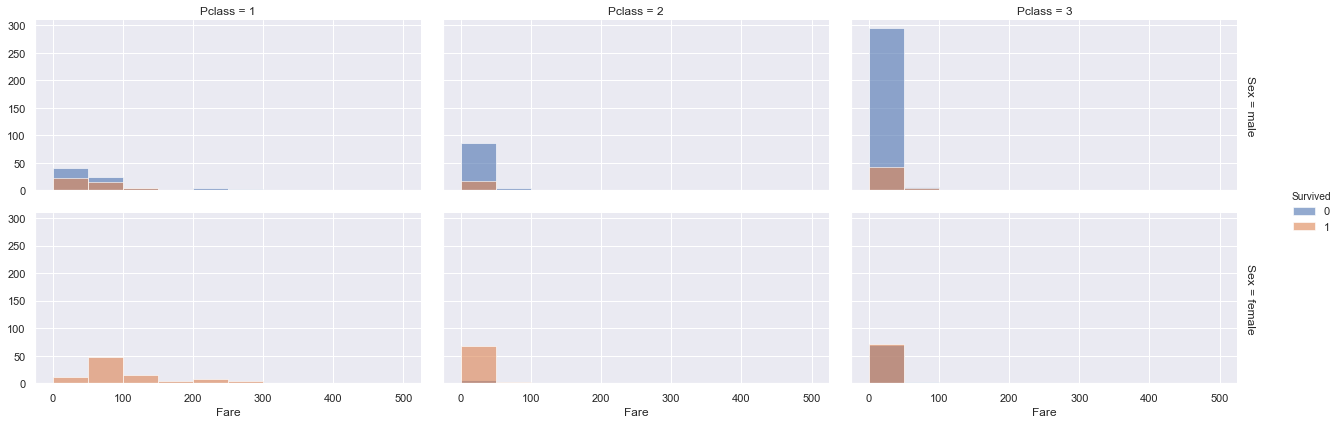

In [73]:
train['Fare'].max()
#output: 512.3292
bins = np.arange(0, 550, 50)
g = sns.FacetGrid(train, row='Sex', col='Pclass', hue='Survived', margin_titles=True, height=3, aspect=2.0)
g.map(sns.distplot, 'Fare', kde=False, bins=bins,hist_kws=dict(alpha=0.6))
g.add_legend()  
plt.show()  

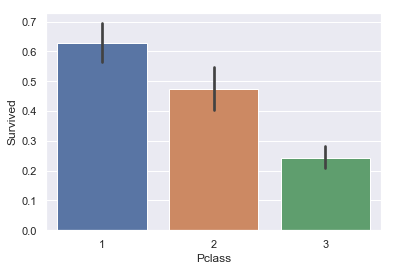

In [77]:
# in default, barplot y axis returns the mean value and the confidence interval
sns.barplot(data = train, x = 'Pclass', y = 'Survived')
plt.show()

1) Pclass 1 has the highest survival rate

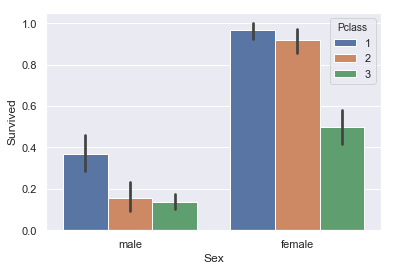

In [79]:
sns.barplot(data = train, x = 'Sex', hue = 'Pclass', y = 'Survived')
plt.show()

1) there is correlation in pclass 

2) females survival rate is much higher

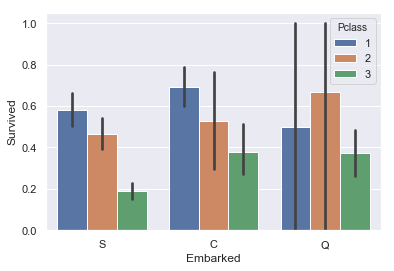

In [80]:
sns.barplot(data = train, x = 'Embarked', hue = 'Pclass', y = 'Survived')
plt.show()

wow, the confidence interval in Q category is not reliable 

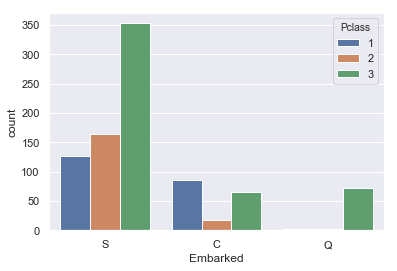

In [81]:
sns.countplot(data = train, x = 'Embarked', hue = 'Pclass')
plt.show()

i see this is why because in Q all of people embarked on pclass 3

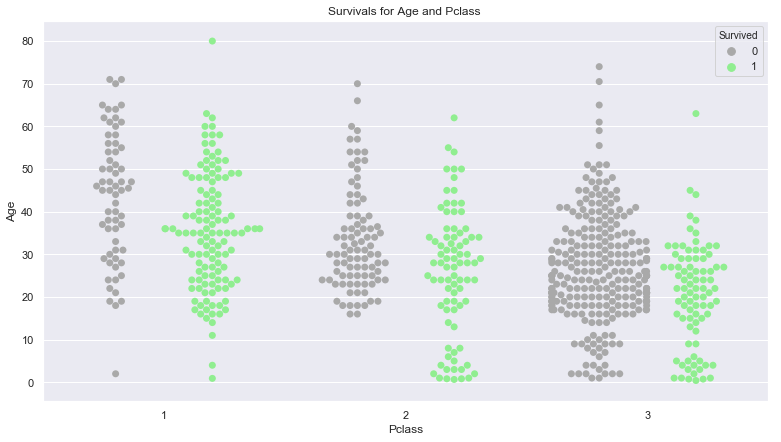

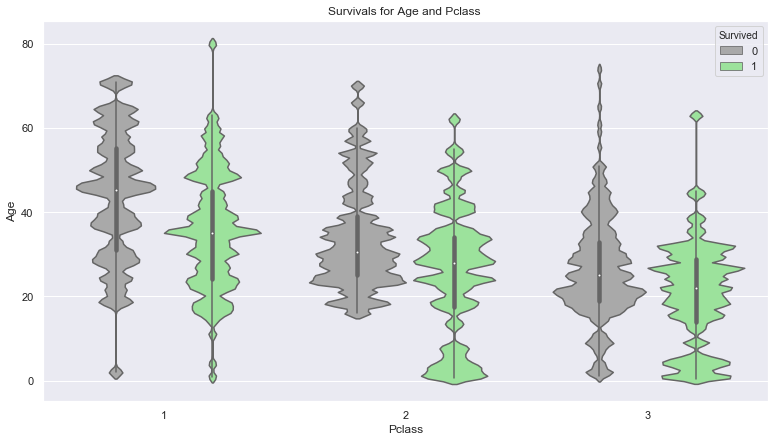

In [84]:
#choose color
cm_surv = ["darkgrey" , "lightgreen"]

#plot swarm
fig, ax = plt.subplots(figsize=(13,7))
sns.swarmplot(x='Pclass', y='Age', hue='Survived', dodge=True, data=train , palette=cm_surv, size=7, ax=ax)
plt.title('Survivals for Age and Pclass ')
plt.show()

#plot violin
fig, ax = plt.subplots(figsize=(13,7))
sns.violinplot(x="Pclass", y="Age", hue='Survived', data=train, dodge=True, bw=0.05 , palette=cm_surv, ax=ax)
plt.title('Survivals for Age and Pclass ')
plt.show()